# Comparing Chl between SeaWIFS and CESM-LE Output
1. load data
2. regrid data
3. compare

In [45]:
%matplotlib inline
import os
from glob import glob

import calendar
import numpy as np
import xarray as xr
import xesmf as xe

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.path as mpath

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean

import util

In [22]:
#Load Model Output from Compressed File processed in cesm-initial-look script
dsmod = xr.open_zarr('data/cesm-le-sst-chl.zarr').compute()
#Load Observational Data from Compressed File processed in Seawifs script
dsobs = xr.open_zarr('data/seawifs/monthly_climatology/chl_gsm/seawifs_L3m_MC_GSM_chl_gsm_9km_global.zarr').compute()

obs data shape: (12, 2160, 4320) model data shape: (12, 384, 320)


In [33]:
dsmod

<xarray.Dataset>
Dimensions:   (month: 12, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15)
Coordinates:
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z_t       (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 ... 12500.0 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf  (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SST       (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.431e+12 7.432e+12
    dz        (z_t) float32 1000.0 1000.0 1000.0 ... 24996.244 24998.11

In [34]:
dsobs

<xarray.Dataset>
Dimensions:  (lat: 2160, lon: 4320, month: 12)
Coordinates:
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * month    (month) <U3 'Jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'
Data variables:
    area     (lat, lon) float64 6.244e+04 6.244e+04 ... 6.244e+04 6.244e+04
    chl_gsm  (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:                       CF-1.6 ACDD-1.3
    _lastModified:                     2018-02-01T11:55:18.000Z
    cdm_data_type:                     grid
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_url:                       http://oceandata.sci.gsfc.nasa.gov
    data_bins:                         4918763
    data_maximum:                      203999543296.0
    data_minimum:                      0.00019056067685596645
    date_created:                      2018-02-01T11:55:18.000Z
    easternmost_longitude:             180.0
    end_orbit_number:                  66564
    geospatial_lat_max:                90.0
    geospatial_lat_min:                -90.0
    geospatial_lat_resolution:         9.27662467956543
    geospatial_lat_units:              degrees_north
    geospatial_lon_max:                180.0
    geospatial_lon_min:                -180.0
    geospatial_lon_resolution:         9.27662467956543
    geospatial_lon_units:              degrees_east
    grid_mapping_name:                 latitude_longitude
    history:                           l3mapgen par=S19980012010031.L3m_MC_GS...
    id:                                S19980012010031.L3b_MC_GSM.nc/L3/S1998...
    identifier_product_doi:            10.5067/ORBVIEW-2/SEAWIFS/L3M/GSM/2018
    identifier_product_doi_authority:  http://dx.doi.org
    institution:                       NASA Goddard Space Flight Center, Ocea...
    instrument:                        SeaWiFS
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    l2_flag_names:                     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,...
    latitude_step:                     0.0833333358168602
    latitude_units:                    degrees_north
    license:                           http://science.nasa.gov/earth-science/...
    longitude_step:                    0.0833333358168602
    longitude_units:                   degrees_east
    map_projection:                    Equidistant Cylindrical
    measure:                           Mean
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    northernmost_latitude:             90.0
    number_of_columns:                 4320
    number_of_lines:                   2160
    platform:                          Orbview-2
    processing_level:                  L3 Mapped
    processing_version:                2018.0
    product_name:                      S19980012010031.L3m_MC_GSM_chl_gsm_9km.nc
    project:                           Ocean Biology Processing Group (NASA/G...
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    publisher_name:                    NASA/GSFC/OBPG
    publisher_url:                     http://oceandata.sci.gsfc.nasa.gov
    southernmost_latitude:             -90.0
    spatialResolution:                 9.28 km
    standard_name_vocabulary:          CF Standard Name Table v36
    start_orbit_number:                2237
    suggested_image_scaling_applied:   No
    suggested_image_scaling_maximum:   20.0
    suggested_image_scaling_minimum:   0.009999999776482582
    suggested_image_scaling_type:      LOG
    sw_point_latitude:                 -89.95833587646484
    sw_point_longitude:                -179.9583282470703
    temporal_range:                    12-year
    time_coverage_end:                 2010-0

### Compare the differences in the data formats:

obs data shape: (12, 2160, 4320) model data shape: (12, 384, 320)


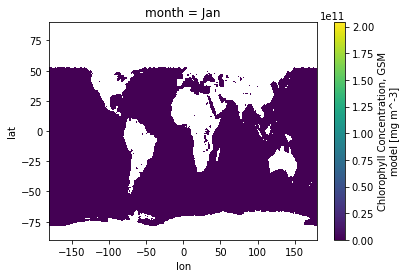

In [29]:
#plot Observational Data:
dsobs.chl_gsm.sel(month='Jan').plot();

obs data shape: (12, 2160, 4320) model data shape: (12, 384, 320)


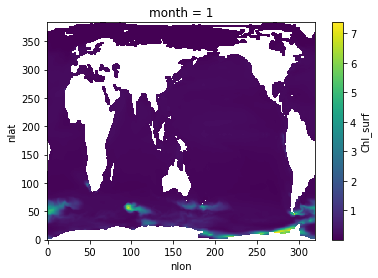

In [30]:
#plot CESM:
dsmod.Chl_surf.sel(month=1).plot();
print('obs data shape:', dsobs.chl_gsm.shape, 'model data shape:', dsmod.Chl_surf.shape)

##### SeaWiFS 
Lat/Lon is normal, grid size is 9km, chl concentration is in a log format?
obs data shape: (12, 2160, 4320)
##### CESM
Lat/Lon is in the pop grid, grid size is 100km, chl concentration is in mg m-3
 model data shape: (12, 384, 320)

## Regrdi between curvilinear grids
https://xesmf.readthedocs.io/en/latest/notebooks/Curvilinear_grid.html

#### Input data

In [47]:
dr_mod = dsmod.Chl_surf
dr_obs =  dsobs.chl_gsm

#### Input grid
We need to rename the coordinate names to lon and lat because xESMF has no way to guess variable meaning.

In [41]:
dsmod = dsmod.rename({'TLAT': 'lon', 'TLONG': 'lat'})
dsmod

<xarray.Dataset>
Dimensions:   (month: 12, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15)
Coordinates:
    lon       (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    lat       (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z_t       (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 ... 12500.0 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf  (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SST       (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.431e+12 7.432e+12
    dz        (z_t) float32 1000.0 1000.0 1000.0 ... 24996.244 24998.11

#### Output grid
Say we want to regrid it to a global 1∘×1∘ grid. xESMF provides a shortcut to make this output grid.

The output coordinates are all 2D arrays. They happen to be a rectilinear grid in this case (`lat` is constant over `x` axis, and `lon` is constant over `y` axis), but you can use 2D arrays to specify any curvilinear grids.

In [46]:
ds_out = xe.util.grid_global(1, 1)
ds_out  # contains lat/lon values of cell centers and boundaries.

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [48]:
regridder = xe.Regridder(dsmod, ds_out, 'bilinear')
dr_mod_out = regridder(dr_mod)

/glade/work/zephyrs/miniconda3/envs/krill/lib/python3.7/site-packages/xesmf/backend.py:52: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn("Latitude is outside of [-90, 90]")


Create weight file: bilinear_384x320_180x360.nc


ImportError: Regrid(filename) requires PIO and does not work if ESMF has not been built with MPI support